In [ ]:
import numpy as np
impsxt pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_excel("Linear Regression.xlsx")

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data.head(2)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0


In [ ]:
data.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

#Model 1

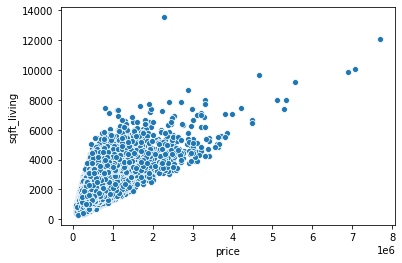

In [ ]:
sns. scatterplot(x=data["price"],y=data["sqft_living"])

It shows a linear relation between the two variables.

In [ ]:
data. corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


The corr value for price and sqft_living is positive nd high. Hence they are strongly positively correlated.

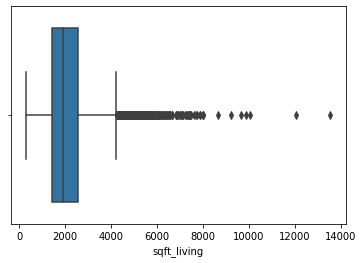

In [ ]:
sns.boxplot(data["sqft_living"])

All outliers are accepted as they r possible in real time analysis.

In [ ]:
y=data.iloc[:,:1]
y.head(2)

,price
0,221900
1,538000


In [ ]:
x=data.iloc[:,1:2]
x.head(2)

,sqft_living
0,1180
1,2570


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.coef_


array([[277.92520052]])

In [ ]:
lin_reg.intercept_

array([-37194.26253221])

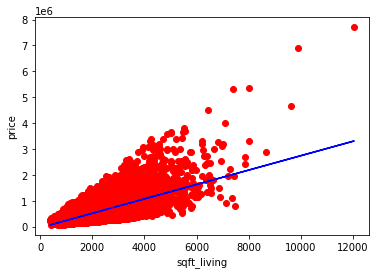

In [ ]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,lin_reg.predict(x_train),color="blue")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()


In [ ]:
ypred=lin_reg.predict(x_test)
ypred

array([[632605.47073112],
       [565903.42260531],
       [365797.27822789],
       ...,
       [515876.88651095],
       [451954.09039039],
       [335225.50617022]])

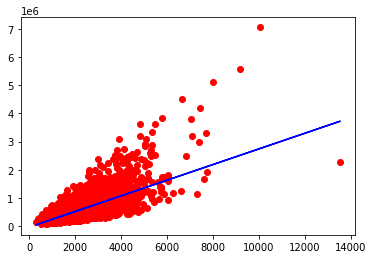

In [ ]:
plt. scatter(x_test,y_test,color="red")
plt.plot(x_test,lin_reg.predict(x_test),color="blue")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
rmse1=np.sqrt(mean_squared_error(y_test,ypred))
print("rmse value: ",rmse1)
r_square=r2_score(y_test,ypred)
print("R square value :",r_square)


rmse value:  271710.0391961516
R square value : 0.5003052919279771


50% of the variation in price can be explained by sqft_living. 

#Model2

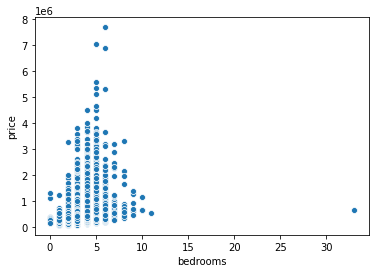

In [ ]:
sns.scatterplot(data["bedrooms"],y=data["price"])

The scatterplot doesnot show a typical linear relationship. The correlation value of bedrooms and price is 0.3 so the are just moderately correlated. 

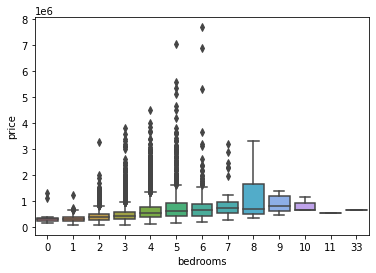

In [ ]:
sns.boxplot(x=data["bedrooms"],y=data["price"])

There are no outliers.

In [ ]:
#new x is bedrooms feature
x=data.iloc[:,2:3]
x.head(2)

,bedrooms
0,3
1,3


In [ ]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=5)

In [ ]:
lin_reg.fit(x_train,y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[118196.13420502]]
[141467.54862036]


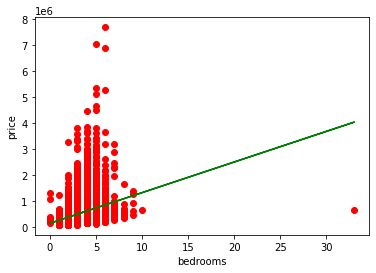

In [ ]:
plt. scatter(x_train,y_train,color="red")
plt.plot(x_train,lin_reg.predict(x_train),color="green")
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

In [ ]:
ypred2=lin_reg.predict(x_test)
ypred2

array([[614252.08544045],
       [496055.95123543],
       [496055.95123543],
       ...,
       [377859.8170304 ],
       [614252.08544045],
       [377859.8170304 ]])

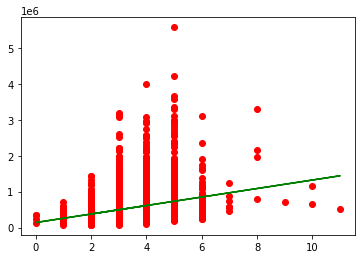

In [ ]:
plt. scatter(x_test,y_test,color="red")
plt.plot(x_test,lin_reg.predict(x_test),color="green")
plt.show()

In [ ]:
rmse2=np.sqrt(mean_squared_error(y_test,ypred2))
r_square2=r2_score(y_test,ypred2)
print("Rmse value: ",rmse2)
print("R squared value: ", r_square2)

Rmse value:  343272.9670152736
R squared value:  0.11250462105548897


#Inference:
11%of the variation in price can be explained by the feature bedrooms.

#Model3

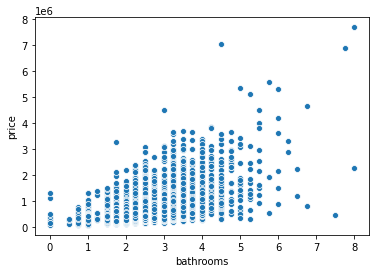

In [ ]:
sns.scatterplot(x= data["bathrooms"],y= data["price"])

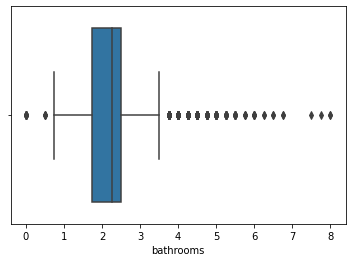

In [ ]:
sns.boxplot(data["bathrooms"])

There are no outliers.
There is a nearly a positive linear relation between bathrooms and price and is explained by the correlation value of 0.5.

In [ ]:
#new x is bathrooms feature.
x=data.iloc[:,3:4]
x.head(2)

,bathrooms
0,1.00
1,2.25


In [ ]:
y. head(2)

,price
0,221900
1,538000


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
lin_reg. fit(x_train,y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[248840.77633798]]
[14640.20448119]


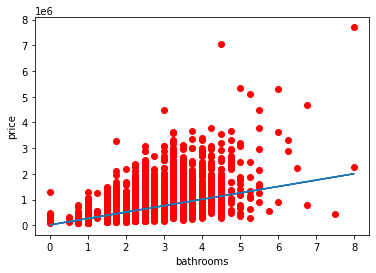

In [ ]:
plt. scatter(x_train,y_train,color="red")
plt.plot(x_train,lin_reg.predict(x_train))
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.show()

In [ ]:
ypred3=lin_reg.predict(x_test)
ypred3

array([[387901.36898815],
       [823372.72757961],
       [201270.78673467],
       ...,
       [636742.14532613],
       [387901.36898815],
       [263480.98081917]])

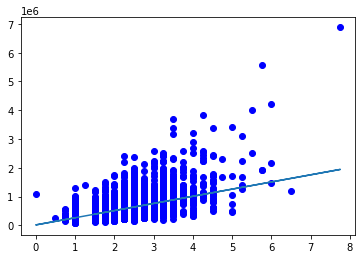

In [ ]:
plt. scatter(x_test,y_test,color="blue")
plt.plot(x_test,ypred3)
plt.show()

In [ ]:
rmse3=np.sqrt(mean_squared_error(y_test, ypred3))
print("rmse value :", rmse3)
r_square3=r2_score(y_test,ypred3)
print("R squared value: ", r_square3)

rmse value : 307726.05201098864
R squared value:  0.2871506569828616


#Inference:
Only 28% of variaion in price can be explained by bathrooms feature.

#Model4

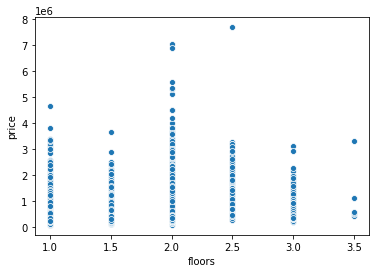

In [ ]:
sns.scatterplot(data["floors"], data["price"])

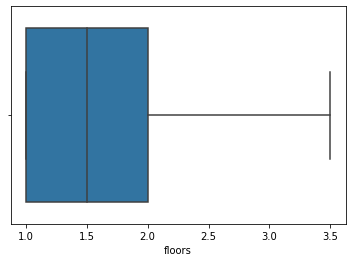

In [ ]:
sns. boxplot(data["floors"])

There is no to little linear relation between floors and price as seen by correlation vaue of 
0.25.
There are no sifnificant outliers.



In [ ]:
# new x feature is floors.
x=data.iloc[:,4:5]
x.head(2)

,floors
0,1.0
1,2.0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)
lin_reg.fit(x_train,y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[170674.2654533]]
[283993.57314855]


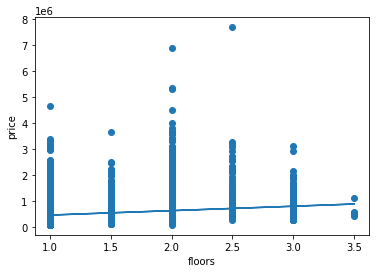

In [ ]:
plt. scatter(x_train,y_train)
plt.plot(x_trJioain,lin_reg.predict(x_train))
plt.xlabel("floors")
plt.ylabel("price")
plt.show()

In [ ]:
ypred4=lin_reg.predict(x_test)
ypred4

array([[540004.97132849],
       [454667.83860185],
       [454667.83860185],
       ...,
       [540004.97132849],
       [454667.83860185],
       [796016.36950844]])

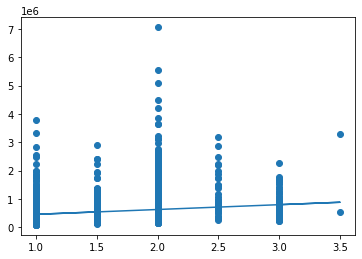

In [ ]:
plt. scatter(x_test,y_test)
plt.plot(x_test,ypred4)
plt.show()

In [ ]:
rmse4=np.sqrt(mean_squared_error(y_test, ypred4))
r_square4=r2_score(y_test,ypred4)
print("rmse value:",rmse4)
print("R squared value :", r_square4)

rmse value: 370964.46052507753
R squared value : 0.06855333989826096


#Inference:
Since R2 value is 0.06855 so Only 6.85%variation in price that can be explained by floors. 